In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
## Replaced all 0 values with NaN for data cleaning
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:
## Fill Mising values with Mean
df.fillna(df.mean(), inplace = True) 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


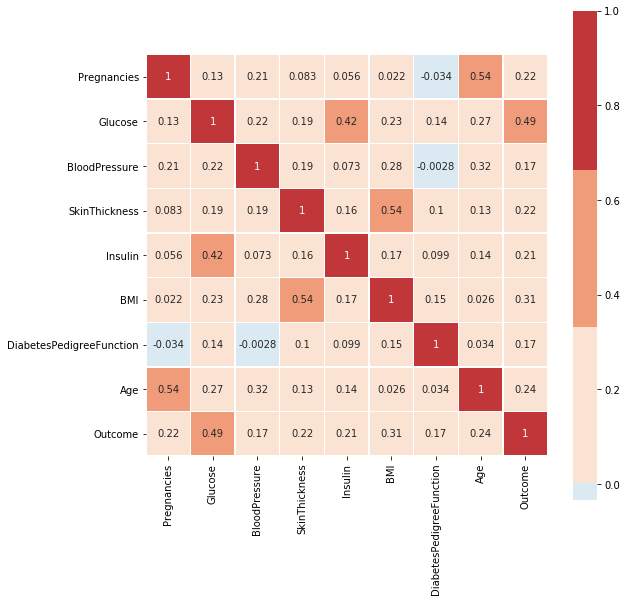

In [7]:
## correlation heatmap
fig = plt.figure(figsize = (9,9))
sns.heatmap(df.corr(),cmap = sns.color_palette("RdBu_r"),center = 0, linewidths=.5, square=True,annot=True)

# update the ylim(bottom, top) values to fix the cut-off on both bottom and bottom
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

<Figure size 720x720 with 0 Axes>

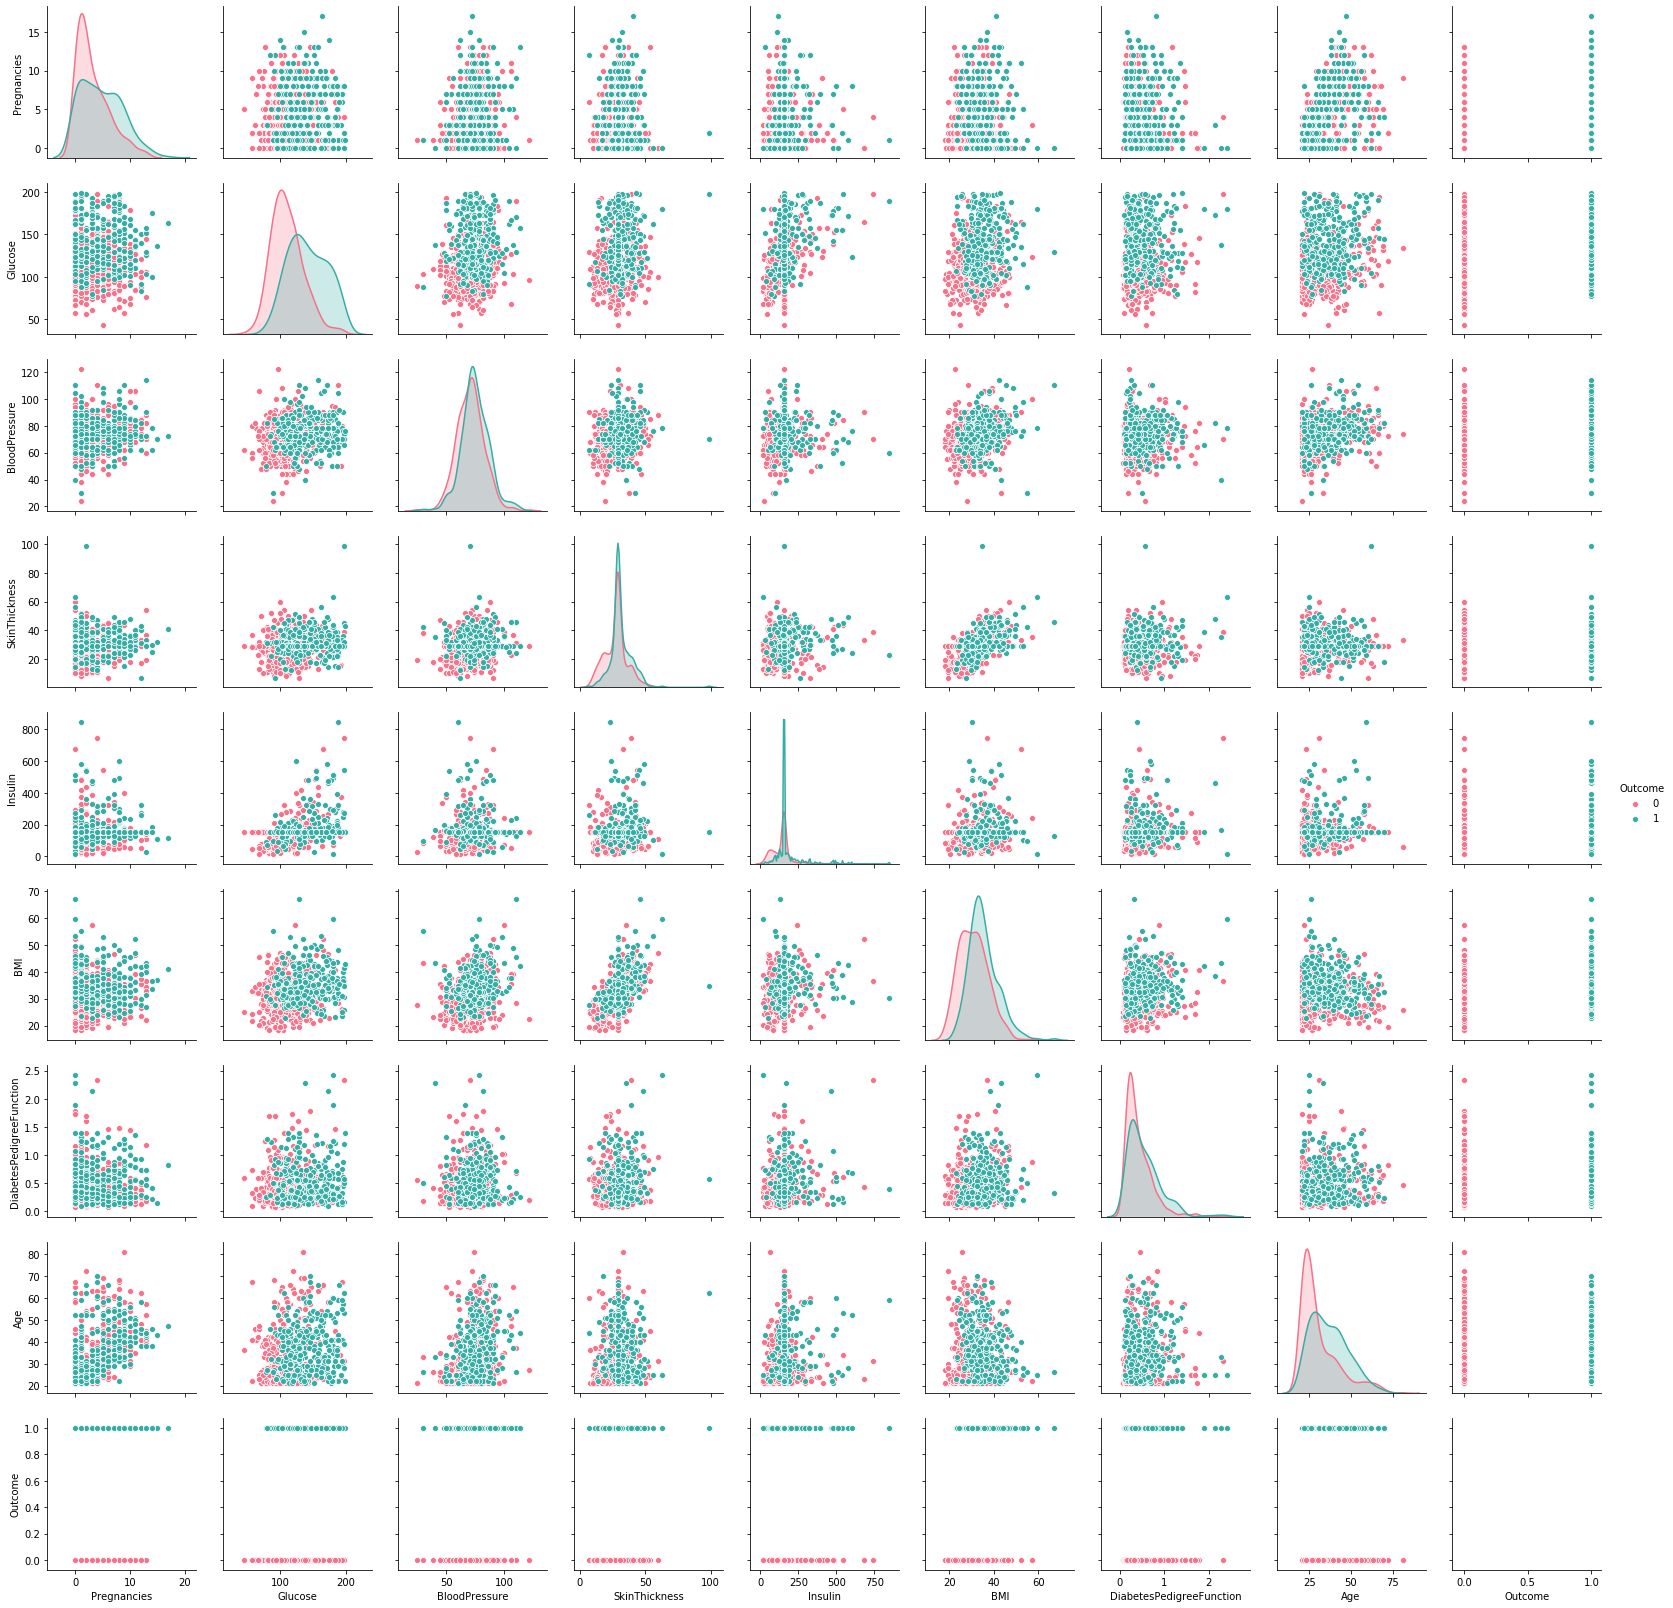

In [8]:
## pairplot
warnings.filterwarnings("ignore")
fig = plt.figure(figsize = (10,10))
pp = sns.pairplot(df, hue = "Outcome", palette = "husl")

## Apply LogisticRegression, SVM, RandomForest classification algorithms. 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [10]:
## split train and test
X = df[df.columns[:8]]
Y = df.Outcome
X_train,X_test,y_train,y_test = train_test_split(X, Y, stratify = Y, test_size=0.3, random_state = 101)

In [11]:
# Logistic Regression
warnings.filterwarnings("ignore")
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
## SVM
SVM = svm.SVC(probability = True)
SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
## Random Forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
## Confusion Matrix & Accuracy
warnings.filterwarnings("ignore")
algos = ["Logistic Regression", "Support Vector Machine", "Random Forest"]
clfs = [LogisticRegression(), svm.SVC(probability = True), RandomForestClassifier()]
accuracy = []
i = 0

print('Confusion Matrix:')
for clf in clfs:
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracy.append(acc)
    y_pred = clf.predict(X_test)
    print(algos[i])
    print(confusion_matrix(y_test, y_pred))
    i = i + 1
accuracy_df = pd.DataFrame(accuracy, index = algos)
accuracy_df.columns = ["Accuracy"]
accuracy_df.sort_values(by = "Accuracy", ascending = False)

Confusion Matrix:
Logistic Regression
[[131  19]
 [ 36  45]]
Support Vector Machine
[[128  22]
 [ 44  37]]
Random Forest
[[131  19]
 [ 40  41]]


,Accuracy
Logistic Regression,0.761905
Random Forest,0.744589
Support Vector Machine,0.714286


## Apply GridSearchCV to find the best hyperparameters for all models. 

In [15]:
hyperparameters = dict(C = [0.3, 0.4, 0.5], penalty = ['l1', 'l2'])

LR_cv = GridSearchCV(LR, hyperparameters, cv = 10)
LR_cv.fit(X_train, y_train)
warnings.filterwarnings("ignore")
LR_cv.best_params_

{'C': 0.4, 'penalty': 'l2'}

In [16]:
hyperparameters = dict(C = [0.5, 1, 1.5], kernel = ['linear', 'poly' ,'rbf' ,'sigmoid'])

SVM_cv = GridSearchCV(SVM, hyperparameters, cv = 10)
SVM_cv.fit(X_train, y_train)
warnings.filterwarnings("ignore")
SVM_cv.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [17]:
hyperparameters = dict(n_estimators = [50, 60, 70], max_depth = [20, 30, 40])

RF_cv = GridSearchCV(RF, hyperparameters, cv = 10)
RF_cv.fit(X_train, y_train)
warnings.filterwarnings("ignore")
RF_cv.best_params_

{'max_depth': 30, 'n_estimators': 70}

## Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business impact viewpoint (false negatives vs false positives).

In [18]:
algos = ["Logistic Regression", "Support Vector Machine", "Random Forest"]
clfs = [LR_cv, SVM_cv, RF_cv]
scores = []
i = 0

print('Confusion Matrix:')
for clf in clfs:
    accuracy = clf.best_score_
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    ROCAUC = roc_auc_score(y_test, y_pred)
    scores.append([accuracy, precision, recall, ROCAUC])
    print(algos[i])
    print(confusion_matrix(y_test, y_pred))
    i = i + 1

scores_df = pd.DataFrame(scores, index = algos)
scores_df.columns = ['Accuracy','Precision', 'Recall', 'ROC AUC']
scores_df

Confusion Matrix:
Logistic Regression
[[131  19]
 [ 41  40]]
Support Vector Machine
[[133  17]
 [ 40  41]]
Random Forest
[[132  18]
 [ 39  42]]


,Accuracy,Precision,Recall,ROC AUC
Logistic Regression,0.778512,0.732292,0.740260,0.683580
Support Vector Machine,0.767400,0.747085,0.753247,0.696420
Random Forest,0.769182,0.746708,0.753247,0.699259


Precision = TP / (TP + FP)  
Recall = TP / (TP + FN)  
For the above three models (Logistic Regression, SVM, and Random Forest), SVM performs the best for its highest percentage of true positives, which means that it has the highest possibility of predicting the patients with diabetes correctly.